In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima_model import ARMA 
plt.style.use('ggplot')
np.random.seed(5000)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)

# AR(1)
_____

In [2]:
def auto_regresive_1_series(sigma2, n, phi, x0 = 0, c = 0):
    '''
    simulación de un AR(1)
    
    regresa un data frame
    '''
    Xt = [x0] #inicialización de la serie
    et = np.random.normal(0,sigma2,n) #generando el ruido blanco de la serie
    
    for t in range(1,n):
        Xt.append(phi*Xt[t-1]+et[t]) #formula del AR(1)
        
    if c !=0: #cuando la serie no empieza en cero
        Xt = [x + c for x in Xt] # se le suma la deriva de la serie
        
    ar1 = pd.DataFrame(Xt, columns = ['Xt']) #ponemos la serie en un df
    return ar1 #devuelve un df

#### AR(1) con parametro phi < 0

la serie se ve como


C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


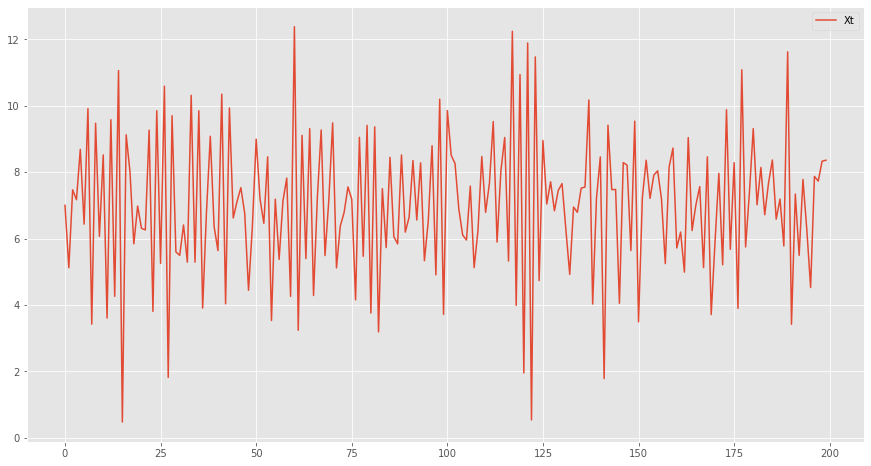

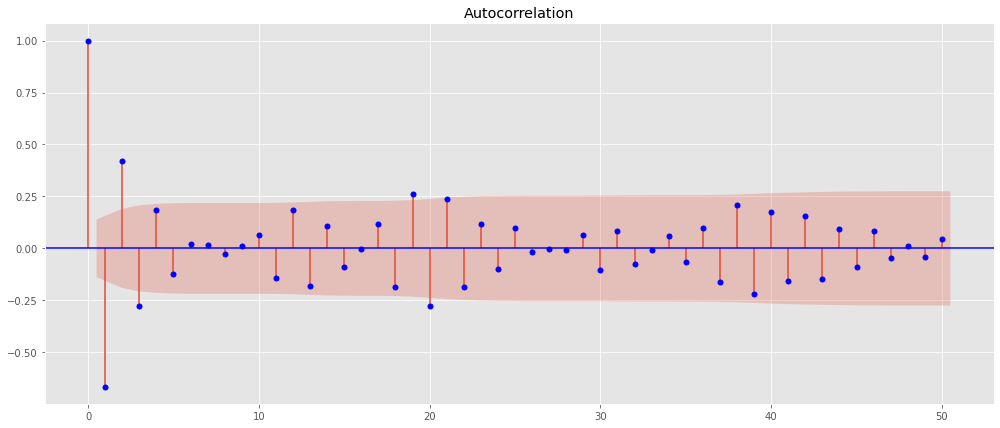

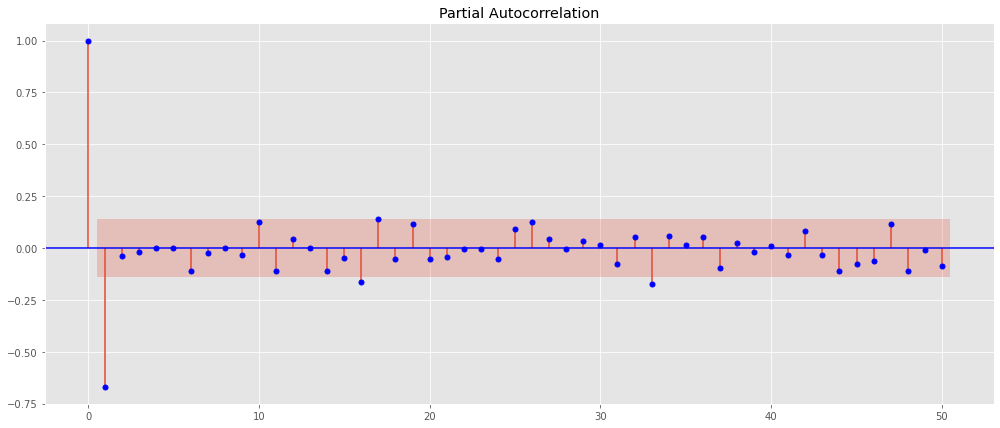

In [3]:
series_ar_1_df = auto_regresive_1_series(sigma2 = 1.5, phi = -0.7, n = 200, c = 7)
print('la serie se ve como')
series_ar_1_df[['Xt']].plot(figsize=(15,8))


lags = 50 
AR_1_CFS = pd.DataFrame([acf(series_ar_1_df['Xt'], nlags = lags), #acf
                         pacf(series_ar_1_df['Xt'], nlags = lags)]).transpose() #pacf

AR_1_CFS.columns = ['acf_AR_1','pacf_AR_1'] #renombrar columnas

plt.style.use('ggplot')
plt.figsize=(15,10)

#graficando ACF
fig = plot_acf(series_ar_1_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)

# graficando PACF
fig = plot_pacf(series_ar_1_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show();

En el AR(1) con con parametro < 0 la correlacion simple se ve escalonada y las autocorrelaciones parciales son las que dan pauta a decidir el orden del autoregresivo, es decir, la primera autocorrelación indica el orden del autoregresivo, además en el correlograma parcial, se nos indica el signo del parametro $\phi$

#### AR(1) con parametro phi > 0

la serie se ve como


C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


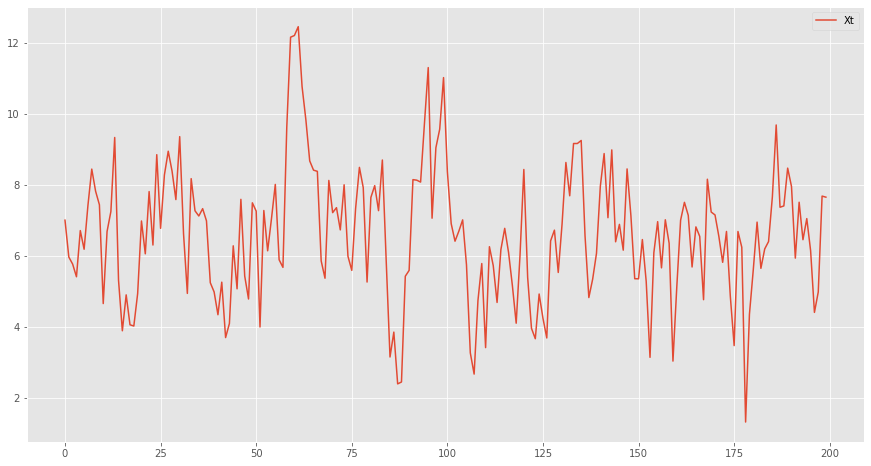

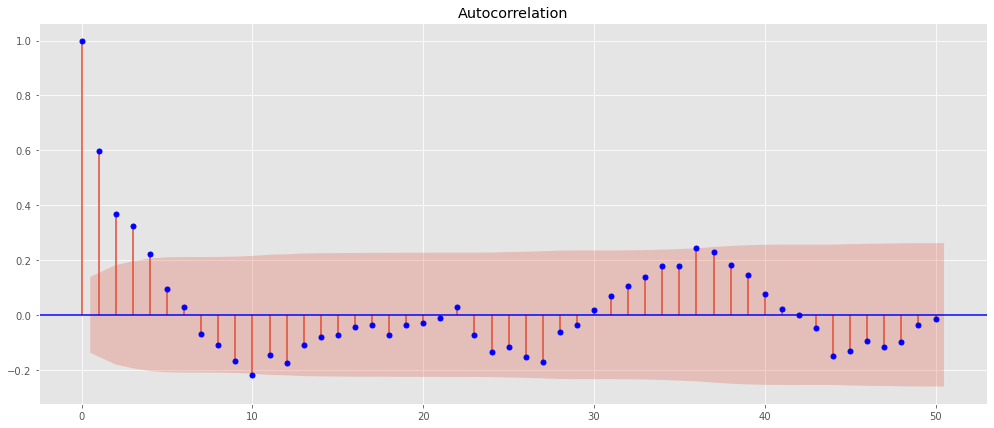

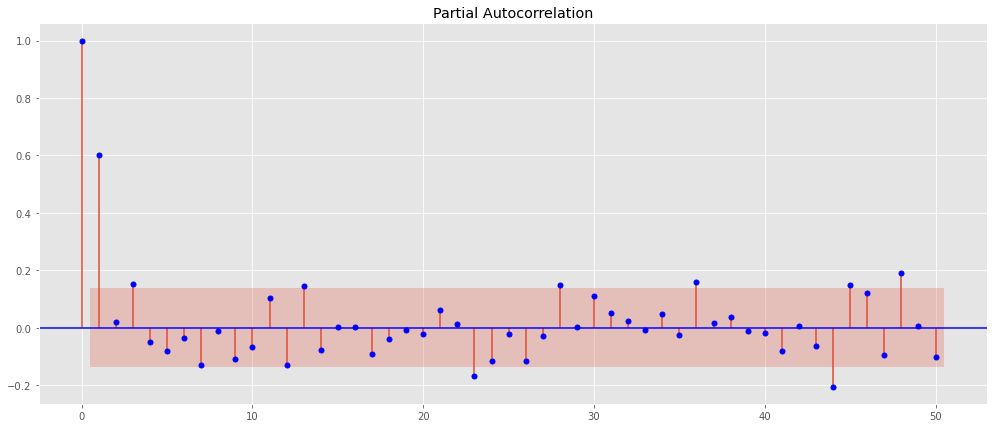

In [4]:
series_ar_1_df = auto_regresive_1_series(sigma2 = 1.5, phi = 0.7, n = 200, c = 7)
print('la serie se ve como')
series_ar_1_df[['Xt']].plot(figsize=(15,8))


lags = 50 
AR_1_CFS = pd.DataFrame([acf(series_ar_1_df['Xt'], nlags = lags), #acf
                         pacf(series_ar_1_df['Xt'], nlags = lags)]).transpose() #pacf

AR_1_CFS.columns = ['acf_AR_1','pacf_AR_1'] #renombrar columnas

plt.style.use('ggplot')
plt.figsize=(15,10)

#graficando ACF
fig = plot_acf(series_ar_1_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)

# graficando PACF
fig = plot_pacf(series_ar_1_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show();

En el AR(1) con con parametro > 0 la correlacion simple se ve escalonada y las autocorrelaciones parciales son las que dan pauta a decidir el orden del autoregresivo, es decir, la primera autocorrelación indica el orden del autoregresivo, además en el correlograma parcial, se nos indica el signo del parametro $\phi$

# AR(2)
_____

<img src='images/AR2triangle.gif'>

Lo que podemos opbservasr en la imagen anterior, es que, al igual que en el AR(1) el que da pauta a elegir el orden del AR(2) es el correlogra parcial, pueste nos indicará que hay 2 significativas, y la acaracterística de los AR(2) es que su correlograma simple tendrá una forma senoidal (escalonado)

condicion de suma correcta
condicion de resta correcta
condicion de valor abs correcta


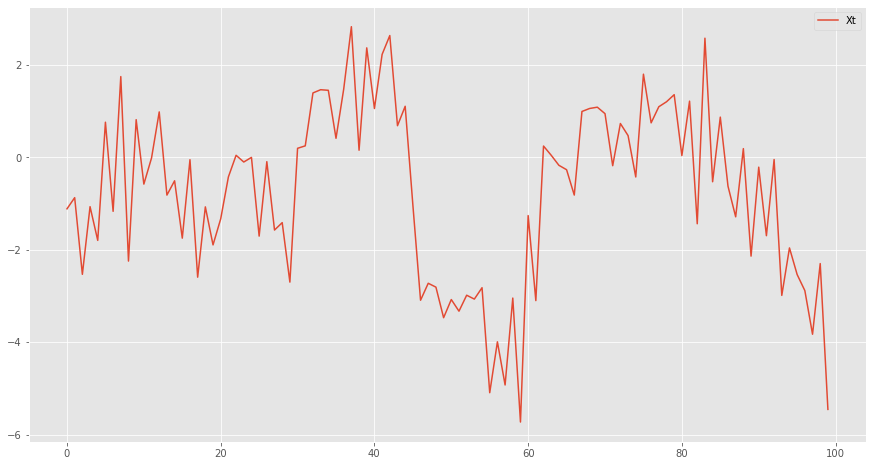

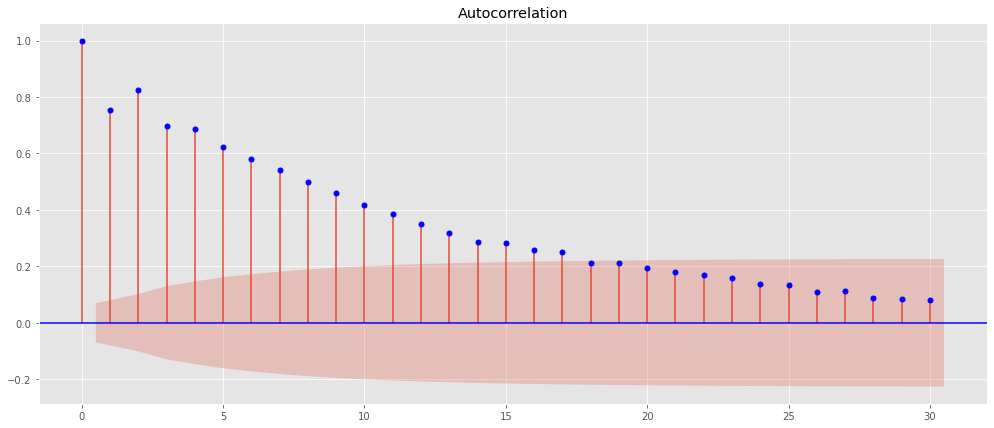

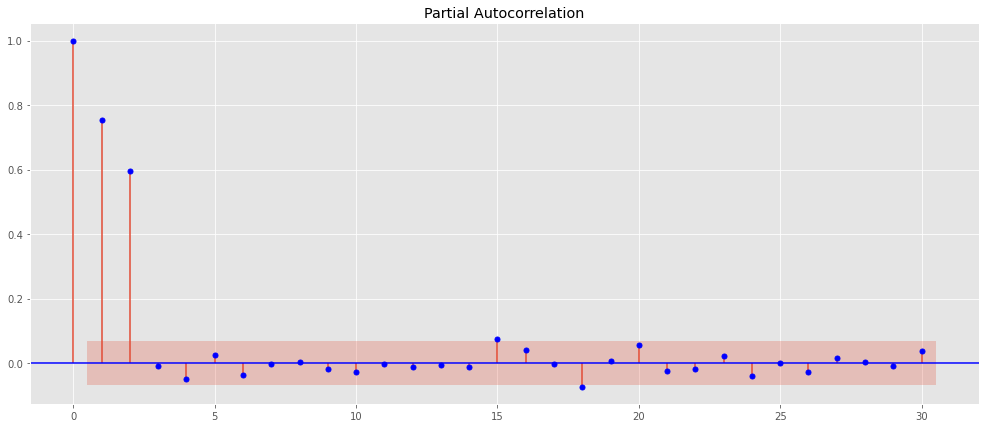

In [17]:
import statsmodels.api as sm

#parametros
phi_1 = .3
phi_2 = .6

# condiciones de convergencia 
if phi_1 + phi_2 < 1:
    print('condicion de suma correcta')
else:
    print('la suma es mayor a 1')
    
if phi_2 - phi_1 < 1:
    print('condicion de resta correcta')
else:
    print('la resta no es menor a 1')
    
if abs(phi_2) < 1:
    print('condicion de valor abs correcta')
else:
    print('phi_2 no es < 1 en valor abs')

ar = np.array([phi_1, phi_2])
#ar = np.array([1.4,-0.85])
n = 800
Xt = sm.tsa.arma_generate_sample(np.r_[1, -ar],np.r_[1, np.array([0, 0])],n,1)
ar_2_df = pd.DataFrame(Xt,columns=['Xt'])
ar_2_df[:100].plot(figsize=(15,8))

plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(ar_2_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(ar_2_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

# AR(P)
_____


Para los modelos AR(P), ya no hay una formula cerrada para cvalcular la varianza cuando la P > 2, y el calculo de las aucorrelaciones también debe hacerse de manera recursiva vía las ecuaciones de Yule-Walker

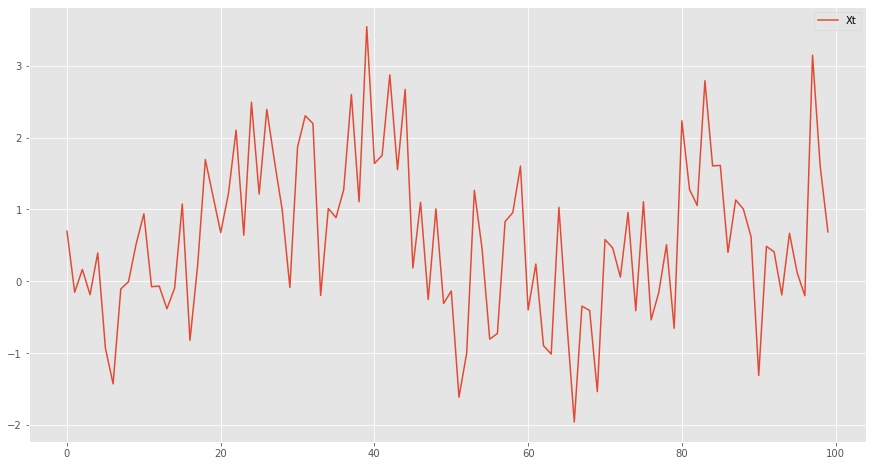

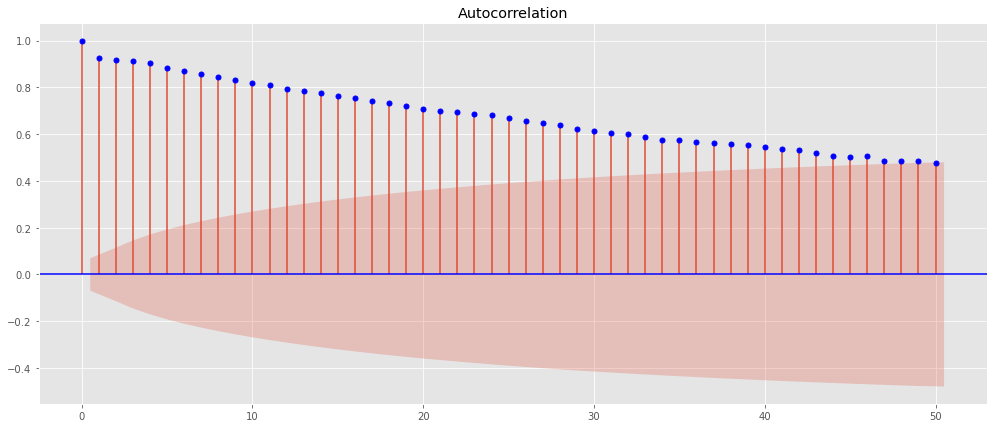

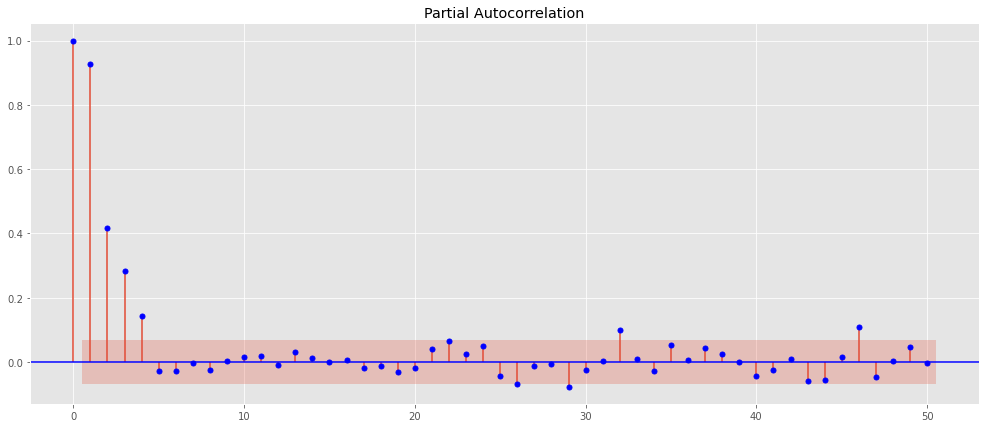

In [7]:
ar = np.array([.25, .25, 0.25, 0.25])

n = 800
Xt = sm.tsa.arma_generate_sample(np.r_[1, -ar],np.r_[1, np.array([0, 0])],n,1)
ar_p_df = pd.DataFrame(Xt,columns=['Xt'])
ar_p_df[:100].plot(figsize=(15,8))

plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(ar_p_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(ar_p_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

In [8]:
from statsmodels.tsa.arima_model import ARMA 

endog = 'Xt' # nombre de la serie
train_fraction = 0.99 # porcentaje de datos de la serie para el entrenamiento
k = int(len(ar_p_df)*train_fraction) #se redondea la fraccion de dados de entrenamiento
p = 4 # orden del modelo AR(P = 4)

time_series_train = ar_p_df[:k] # datos de entrenamiento
time_series_test  = ar_p_df[k:] # datos de prueba

ar_p_model = ARMA(time_series_train[endog], order=(p,0)).fit() #ajuste del modelo con el train_set
display(ar_p_model.summary()) #resumen del modelo

# predicciones de todos los datos, incluyendo los que no ha visto el modelo
# esta serie de datos se ponen en una nueva columna
ar_p_df[endog+'_est'] = ar_p_model.predict(start=0, end=len(ar_p_df)) 

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Xt   No. Observations:                  792
Model:                     ARMA(4, 0)   Log Likelihood               -1132.454
Method:                       css-mle   S.D. of innovations              1.009
Date:                Mon, 11 Apr 2022   AIC                           2276.908
Time:                        18:59:50   BIC                           2304.955
Sample:                             0   HQIC                          2287.687
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6199      2.338      0.265      0.791      -3.962       5.202
ar.L1.Xt       0.2952      0.035      8.481      0.000       0.227       0.363
ar.L2.Xt       0.2289      0.035      6.515      0.000       0.160       0.298
ar.L3.Xt       0.2611      0.035      7.418      0.000       0.192       0.330
ar.L4.Xt       0.2010      0.035      5.757      0.000       0.133       0.269
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0058           -0.0000j            1.0058           -0.0000
AR.2           -0.2173           -1.6116j            1.6262           -0.2713
AR.3           -0.2173           +1.6116j            1.6262            0.2713
AR.4           -1.8704           -0.0000j            1.8704           -0.5000
-----------------------------------------------------------------------------
"""

Lo que se tiene que observar del resumen estadístico anterior es en el modulo de las raíces, estos modulos deben de estar fuera del circulo unitario complejo, es decir, en su modulo ser mayores a la unidad para conservar el criterio de estacionaridad 

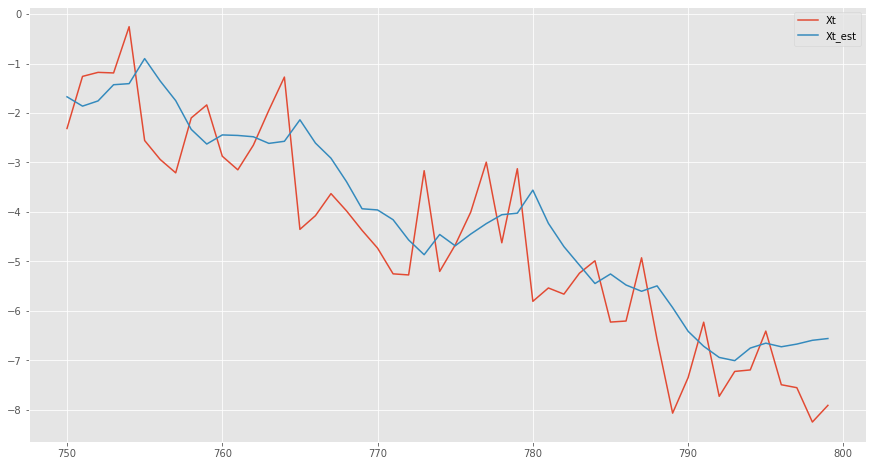

In [9]:
# ploteamos la serie con las predicciones, para observar el ajuste
ar_p_df.tail(50).plot(figsize=(15,8));

# MA(1)
_____

El supuesto fuerte de los modelos de medias moviles es que son estacionarios

la serie se ve como:


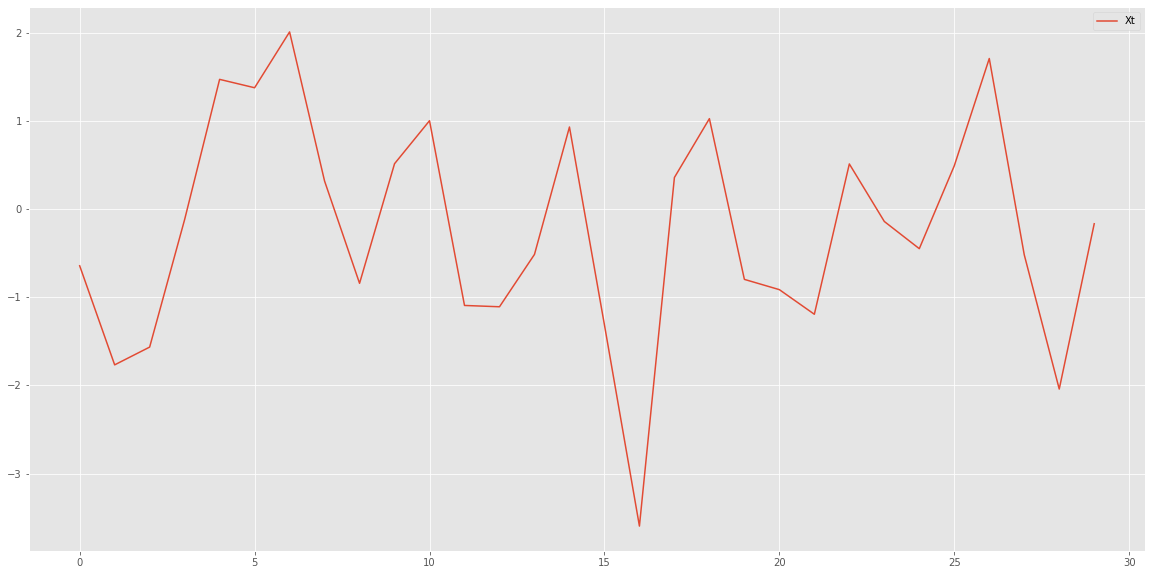

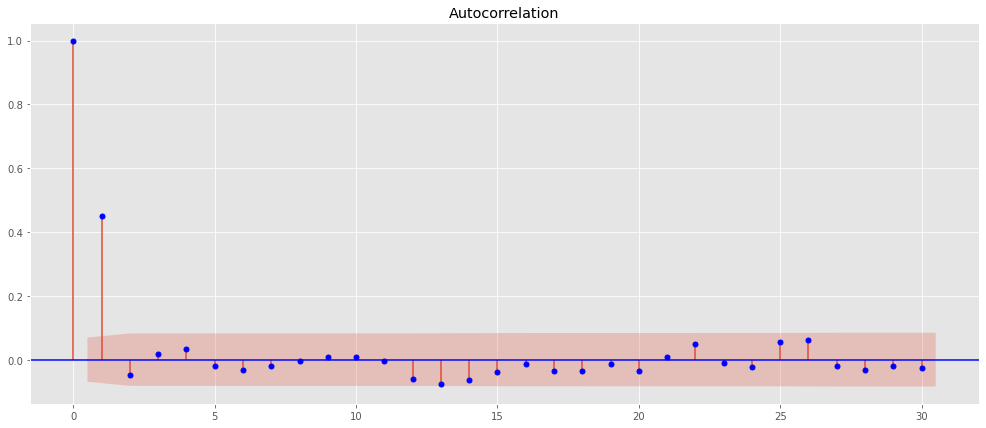

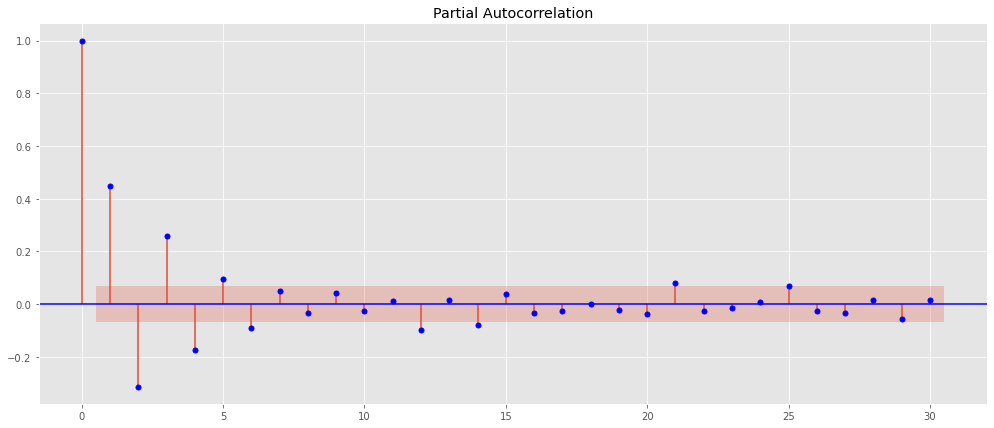

In [11]:
import statsmodels.api as sm


# simulando un MA(1)
np.random.seed(5000)
ma = np.array([0.8]) #parametro del MA(1)
n = 800
endog = 'Xt'
lags = 30

Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])], np.r_[1, ma], n) #simulación del MA(1)
ma_1_df = pd.DataFrame(Xt, columns=[endog])  # la simulación la metemos a un DF
ma_1_df.head(30).plot(figsize=(20,10)) # ploteo de los primero 30 datos

plt.style.use('ggplot')
print('la serie se ve como:')
plt.figsize=(15,10)

# correlaciones simples
fig = plot_acf(ma_1_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)

#correlaciones parciales
fig = plot_pacf(ma_1_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

De los modelos de medias moviles podemos ver como los correlogramas de ACF y PACF se invierten en relacion a los AR(1), es decir, que si en los correlogramas simples de los AR veiamos una "caida amortigüada" en los correlogramas de MA lo que vamos a ver es que sólo las n (n = 1) primeras serán las significativas (lo que nos indicaría el orden del MA), mientras que el correlograma parcial de las MA se verán como caidas amortiguadas y en los AR sólo sobresalían las más significativas.

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Xt   No. Observations:                  800
Model:                     ARMA(0, 1)   Log Likelihood               -1122.963
Method:                       css-mle   S.D. of innovations              0.984
Date:                Mon, 11 Apr 2022   AIC                           2249.926
Time:                        19:20:48   BIC                           2259.295
Sample:                             0   HQIC                          2253.525
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Xt       0.7868      0.024     33.187      0.000       0.740       0.833
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2710           +0.0000j            1.2710            0.5000
-----------------------------------------------------------------------------
"""

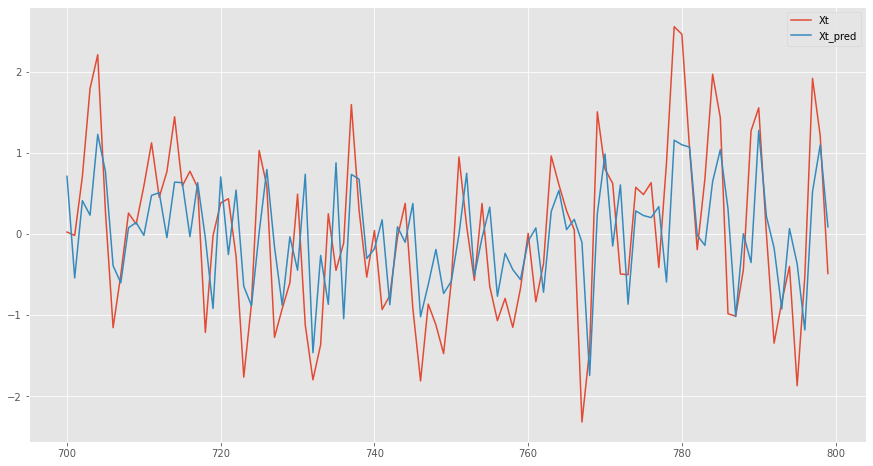

In [16]:
from statsmodels.tsa.arima_model import ARMA 

ma_1_model = ARMA(ma_1_df[endog], order=(0,1)).fit(trend='nc') #se ajusta un modelo MA
display(ma_1_model.summary()) #resumen estadistico del modelo

# se hacen las pedicciones y se le pega una nueva columna al df
ma_1_df[endog+'_pred'] = ma_1_model.predict(start=0,end=len(ma_1_df))
ma_1_df.tail(100).plot(figsize=(15,8)) ;

# MA(2)
_____

el correlograma Parcial para los MA(2) no tinene una formula cerrada, por lo que solo podriamos conocer a priori su correlograma simple (el que da pauta a conocer el orden del modelo), es decir, esperamos que solo las primeras autocorrelaciones sean las significativas.

Una característcia importante de los MA es que los ACF (correlaciones simples) no son únicos, es decir, los parametros $\theta_1, \theta_2$ que ajustan a la MA pueden estar asociados a más de 1 correlograma simple, por lo que estos parametros necesitan cumplir ciertas condiciones de "invertibilidad"/"unicidad" para poder elegir un buen modelo

condicion de suma correcta
condicion de resta correcta
condicion de valor abs correcta


la serie se ve como


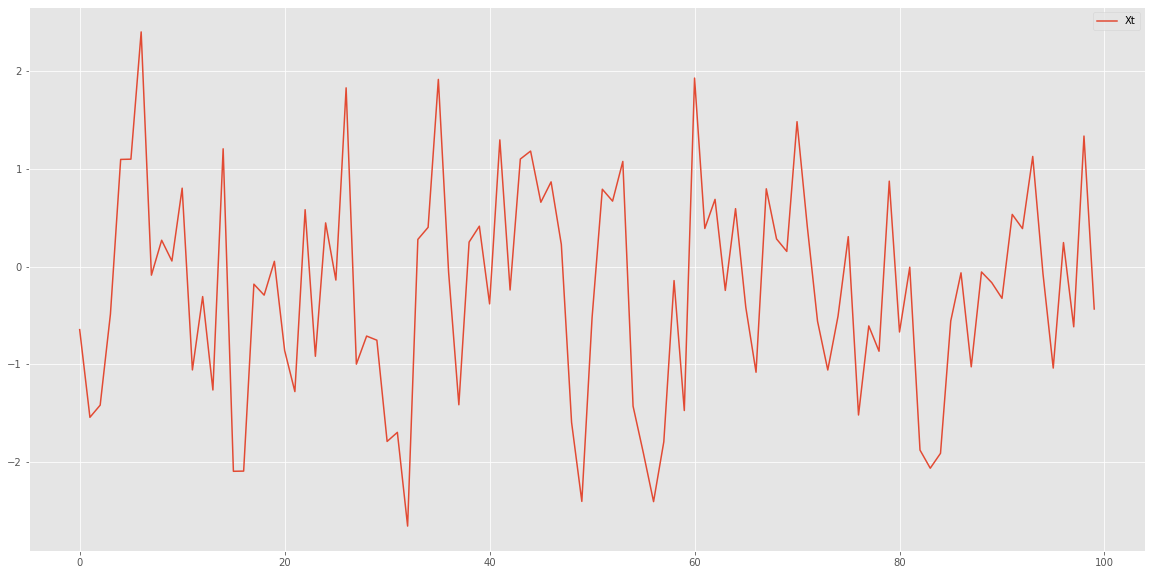

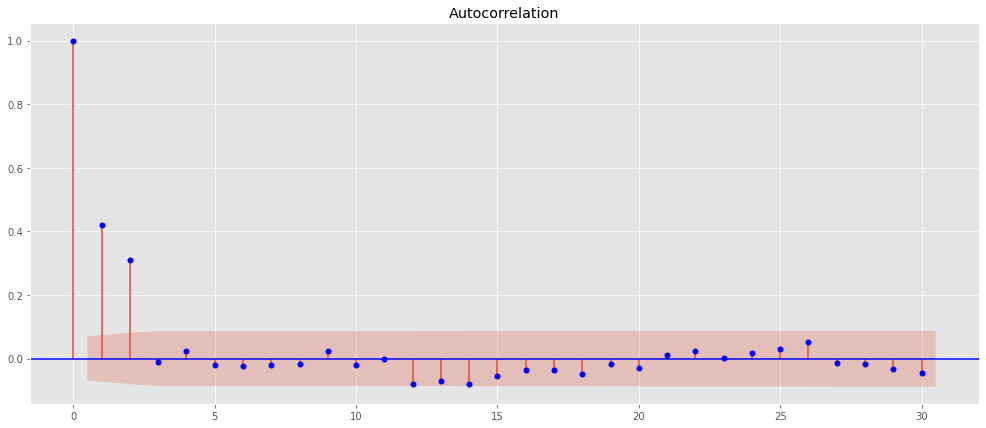

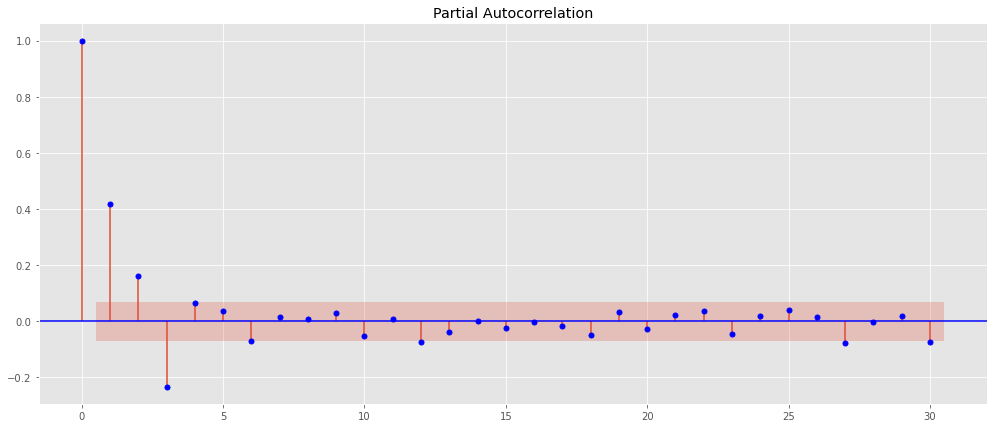

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Xt   No. Observations:                  800
Model:                     ARMA(0, 2)   Log Likelihood               -1121.788
Method:                       css-mle   S.D. of innovations              0.983
Date:                Mon, 11 Apr 2022   AIC                           2249.576
Time:                        19:37:51   BIC                           2263.630
Sample:                             0   HQIC                          2254.975
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Xt       0.4172      0.033     12.565      0.000       0.352       0.482
ma.L2.Xt       0.4042      0.032     12.643      0.000       0.342       0.467
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.5160           -1.4858j            1.5729           -0.3032
MA.2           -0.5160           +1.4858j            1.5729            0.3032
-----------------------------------------------------------------------------
"""

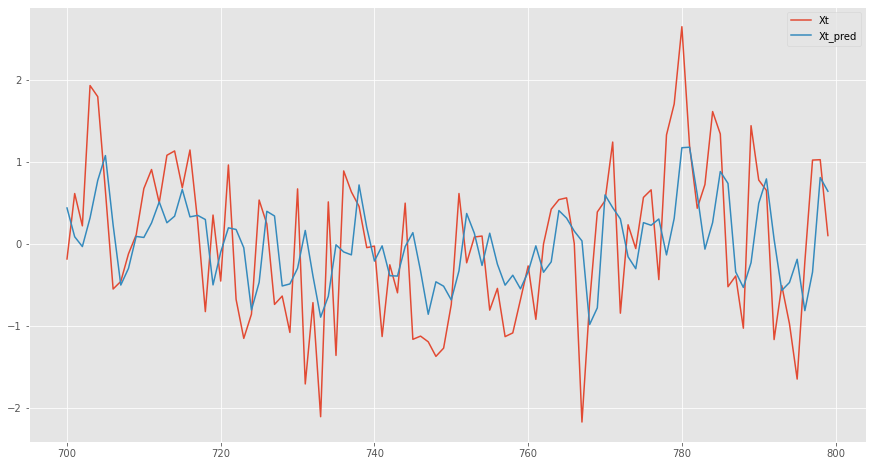

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA 

#parametros
theta_1 = .45
theta_2 = .45

# condiciones de convergencia 
if theta_1 + theta_2 < 1:
    print('condicion de suma correcta')
else:
    print('la suma es mayor a 1')
    
if theta_2 - theta_1 < 1:
    print('condicion de resta correcta')
else:
    print('la resta no es menor a 1')
    
if abs(theta_2) < 1:
    print('condicion de valor abs correcta')
else:
    print('phi_2 no es < 1 en valor abs')

np.random.seed(5000)
ma = np.array([theta_1, theta_2])
n = 800
endog = 'Xt'
lags = 30

Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])], np.r_[1, ma],n) #simulacion MA(2)
ma_2_df = pd.DataFrame(Xt, columns=[endog]) #metemos la simu a un df
print('\n\nla serie se ve como')
ma_2_df.head(100).plot(figsize=(20,10)) #plot de la simulacion

plt.style.use('ggplot')
plt.figsize=(15,10)
# correlograma simple
fig = plot_acf(ma_2_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
# correlograma parcial
fig = plot_pacf(ma_2_df['Xt'],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

ma_2_model = ARMA(ma_2_df[endog], order=(0,2)).fit(trend='nc') #ajuste de un MA(2)
display(ma_2_model.summary()) #resumen del modelo

# prediccion de la serie completa, se mete en el df
ma_2_df[endog+'_pred'] = ma_2_model.predict(start=0,end=len(ma_1_df))
ma_2_df.tail(100).plot(figsize=(15,8));

**Nota:** Las condiciones de invertibilidad/unicidad de los correlogramas simples de orden 2 para los _MA(2)_ son exactamento los mismos que para los de estacionariedad de los _AR(2)_

Para las medias moviles de orden _q_ es análogo a los AR, la unicidad/invertibilidad de los modelos está condicionada a que las raices del modelo estén fuera del circulo unitario complejo, es decir, que en modulo sean mayor a la unidad

# Ejercicios de Series
_____

### Parametros de elección para un modelo
    - un P_value < 0.05 (significancia) en parametros $\theta ,\phi$
    - que los intervalos de confianza de estos [perc_25, perc_75] no contengan al cero
    - un z value alto
    - el modulo sea > 1

y si existe empate entre más de un modelo, un criterio de desempate podría ser el AIC o el BIC u otras metricas como la raiz del error cuadratico medio (RMSE), el valor absoluto medio de los errores, o el error porcentual promedio

In [25]:
pd.read_csv('series.csv').head()

,At,Bt,Ct,Dt,Et,Ft,Gt
0,0.000000,-1.113468,0.000000,1.064147,0.343272,0.236695,-0.116054
1,-0.514973,-0.871955,-0.284736,0.735961,0.806142,0.214934,-1.255335
2,-0.422111,-2.643135,1.490145,0.051774,-0.141173,-0.012469,-0.976847
3,0.675507,-1.187320,-0.949447,-1.299200,0.987759,-1.706127,-0.026171
4,0.772674,-2.164280,-0.880506,-0.428143,0.205166,-3.157380,0.842873


así se ve la serie de datos


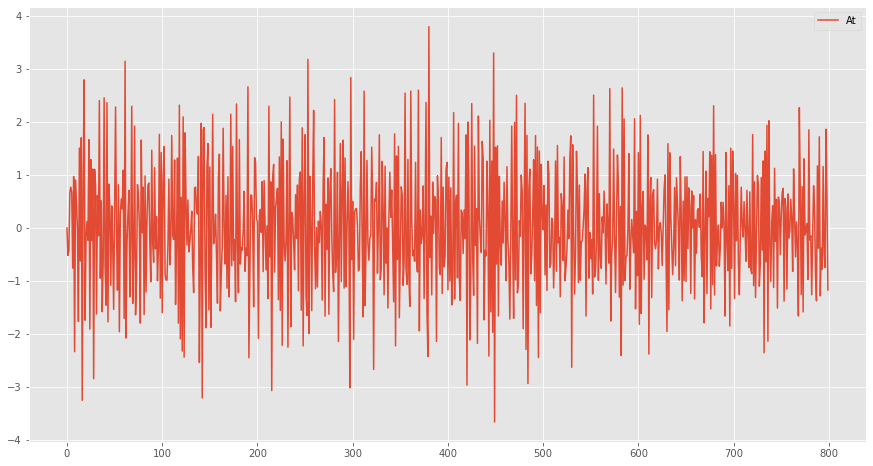

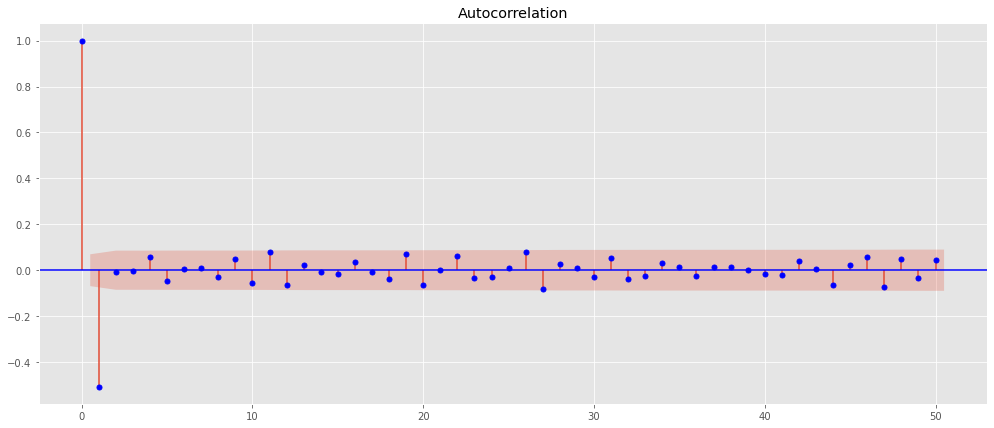

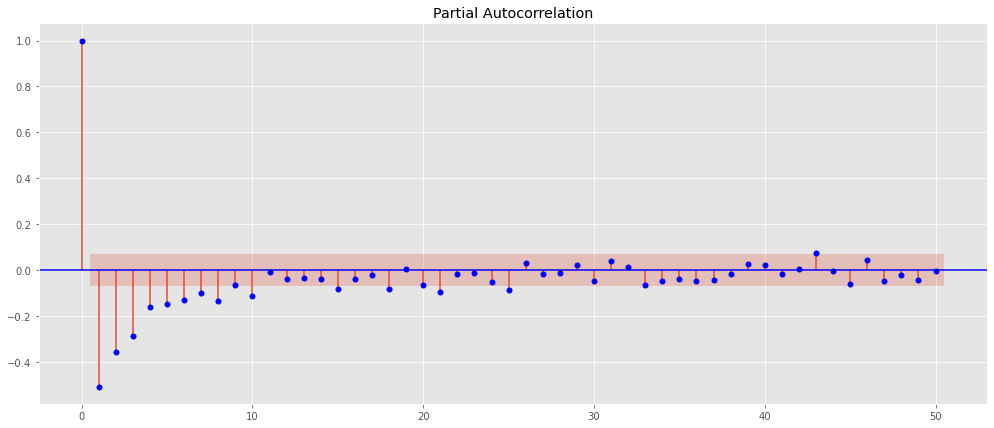

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     At   No. Observations:                  800
Model:                     ARMA(0, 1)   Log Likelihood               -1037.985
Method:                       css-mle   S.D. of innovations              0.885
Date:                Mon, 11 Apr 2022   AIC                           2079.969
Time:                        20:00:34   BIC                           2089.339
Sample:                             0   HQIC                          2083.569
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.At      -0.9134      0.016    -58.310      0.000      -0.944      -0.883
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0949           +0.0000j            1.0949            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

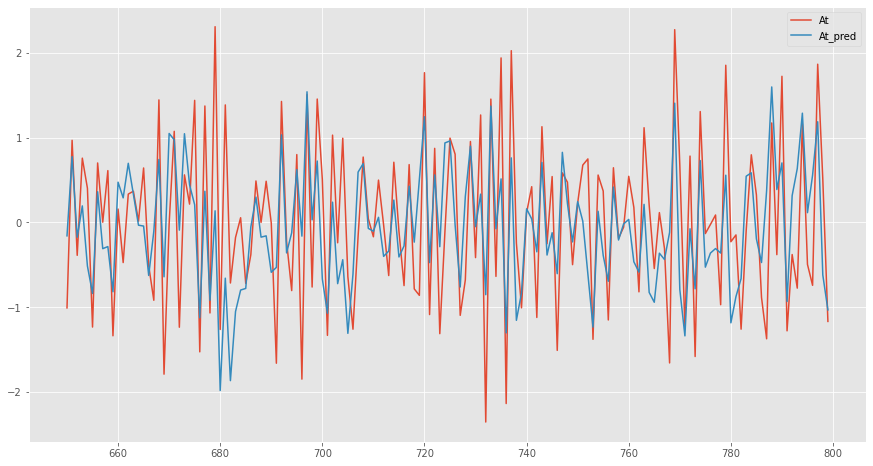

In [33]:
# serie a trabajar
endog = 'At'  # MA(1)
series_df = pd.read_csv('series.csv')

print('así se ve la serie de datos')
series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(0,1)).fit(trend='nc') #no constant se ajusta un MA(1|)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


Viendo las correlaciones lo ideal sería modelar con un MA(1). Recordemos que existe el Teorema de Dualidad, el cual explica que podemos representar un MA(p) como un AR($ \infty $) y un AR(q) como un MA($ \infty $). Para este ejercicio tambien se puede modelar con un AR(15) por ejemplo, pero por el principio de parsimonia siempre elegiremos un modelo "sencillo" porque es más facil de explciar y computacionalmente es más óptimo.

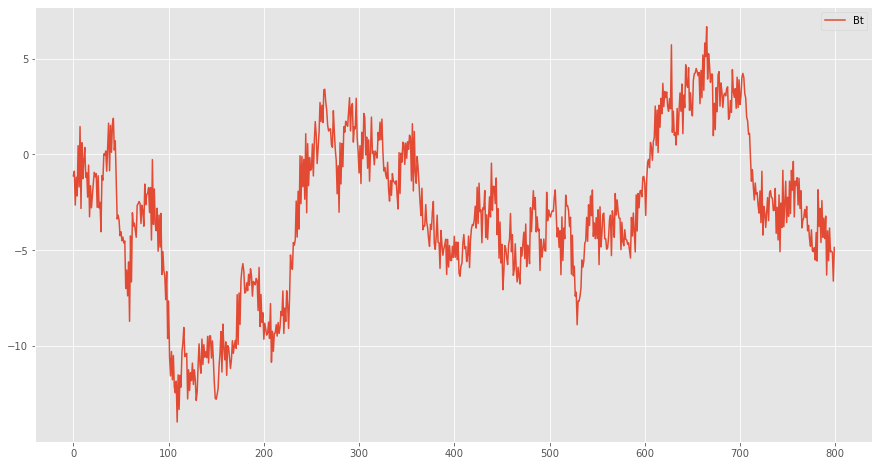

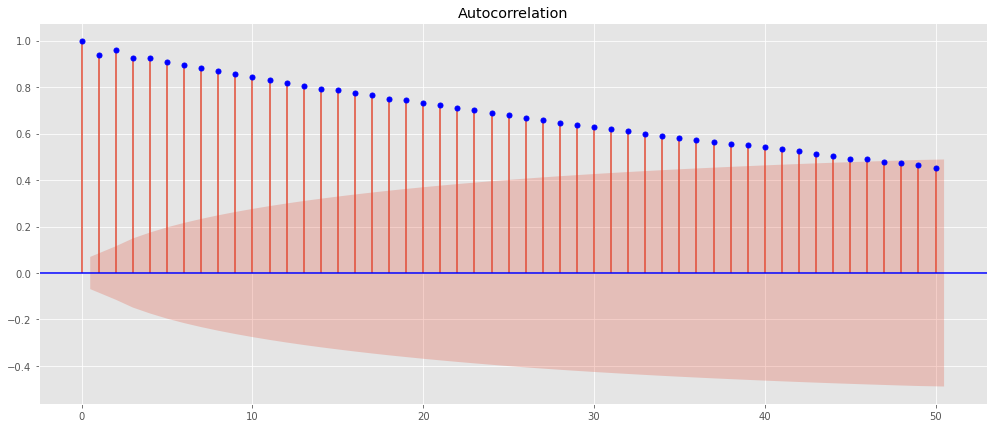

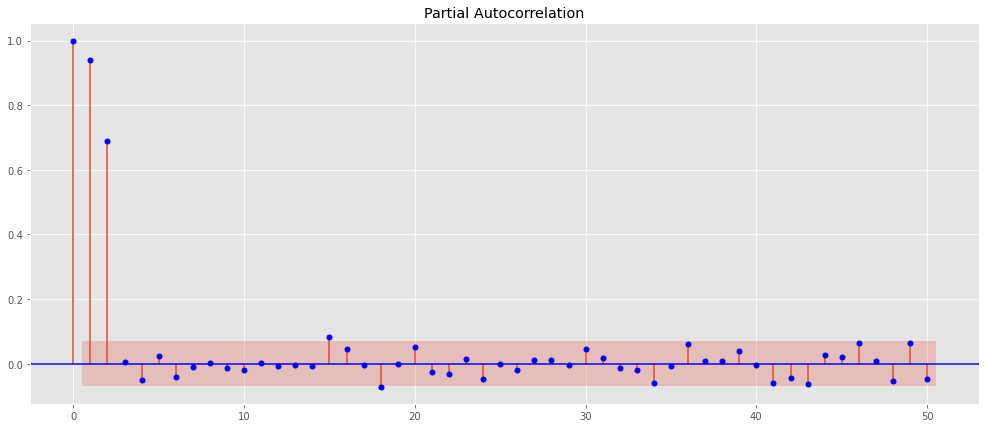

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Bt   No. Observations:                  800
Model:                     ARMA(2, 0)   Log Likelihood               -1161.192
Method:                       css-mle   S.D. of innovations              1.031
Date:                Tue, 12 Apr 2022   AIC                           2328.383
Time:                        18:30:11   BIC                           2342.437
Sample:                             0   HQIC                          2333.782
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.Bt       0.3021      0.026     11.759      0.000       0.252       0.352
ar.L2.Bt       0.6848      0.026     26.632      0.000       0.634       0.735
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0078           +0.0000j            1.0078            0.0000
AR.2           -1.4489           +0.0000j            1.4489            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

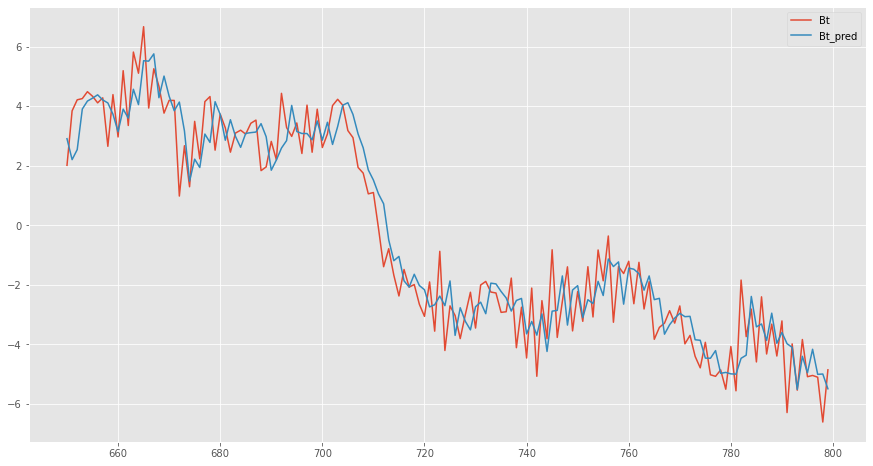

In [3]:
#serie a estudiar
endog = 'Bt' # AR(2)

series_df = pd.read_csv('series.csv')

series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(2,0)).fit(trend='nc') #ajuste de un AR(2)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


Cuando el correlograma simple muestra una caida escalonada "suave", podemos inferir que a la serie se le puede hacer una diferenciación, pero eso es un tema que se verá más adelante, a pesar de que este modelo necesite una diferenciacion, los modulos de del AR(2) son mayores a la unidad, aunque el primer parametro está muy cercano al uno 

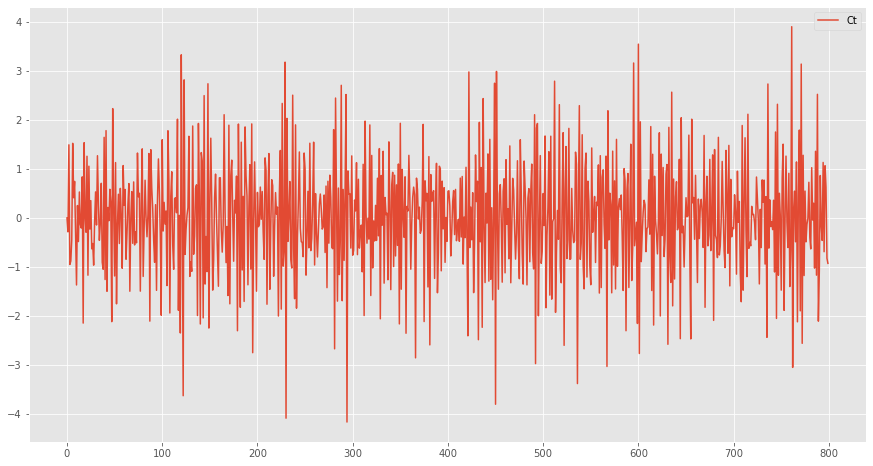

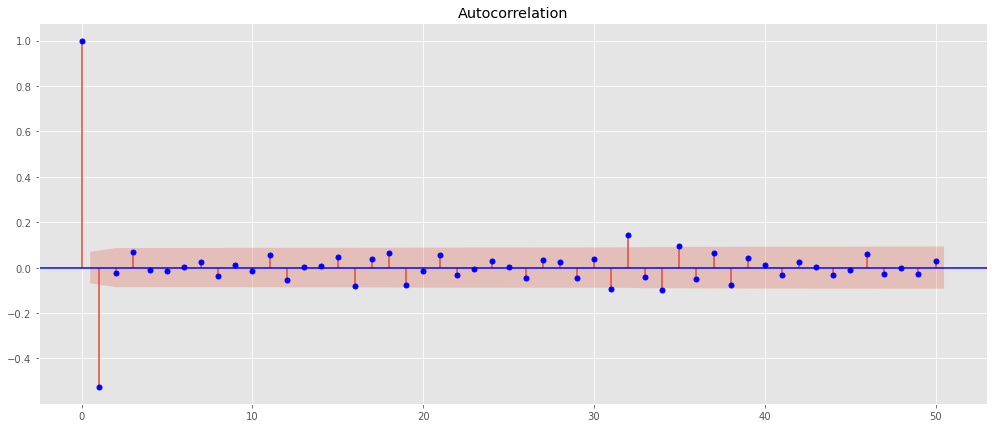

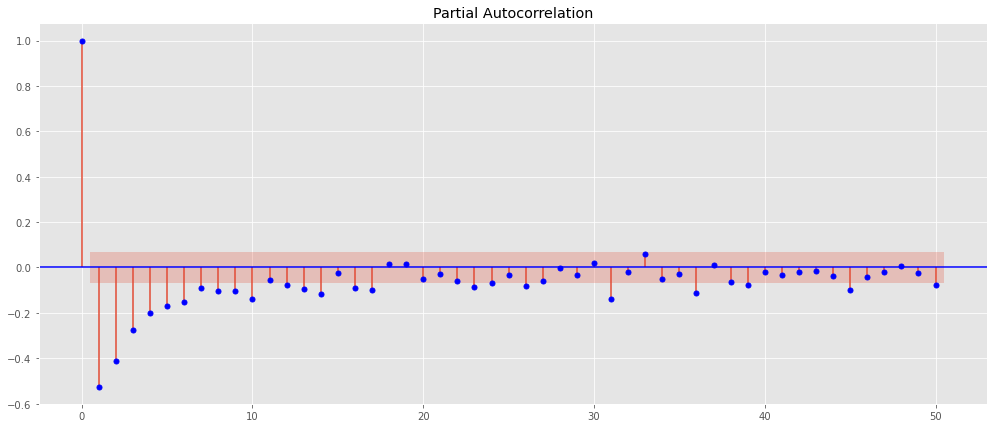

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Ct   No. Observations:                  800
Model:                     ARMA(0, 1)   Log Likelihood                -976.546
Method:                       css-mle   S.D. of innovations              0.818
Date:                Tue, 12 Apr 2022   AIC                           1957.092
Time:                        18:33:30   BIC                           1966.462
Sample:                             0   HQIC                          1960.692
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Ct      -0.9921      0.007   -134.024      0.000      -1.007      -0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0080           +0.0000j            1.0080            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

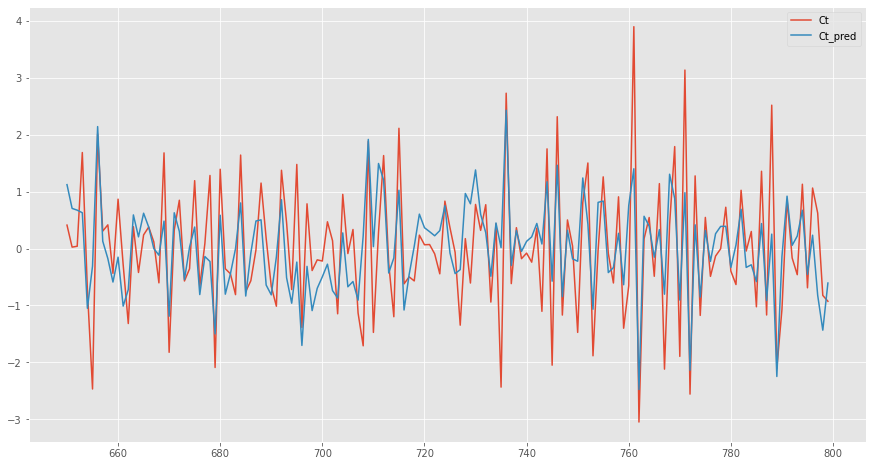

In [4]:
endog = 'Ct' # MA(1)

series_df = pd.read_csv('series.csv')

series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(0,1)).fit(trend='nc') #ajuste de un MA(1)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


El primer correlograma es el que nos indica que podemos intentar un MA(1)

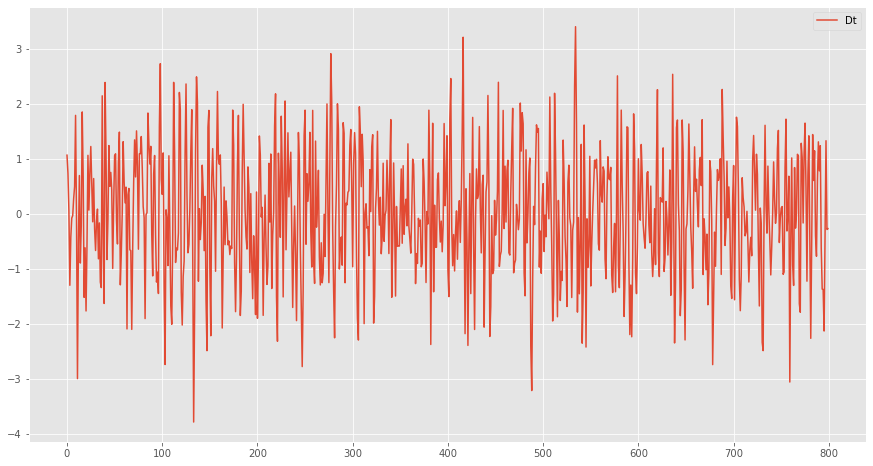

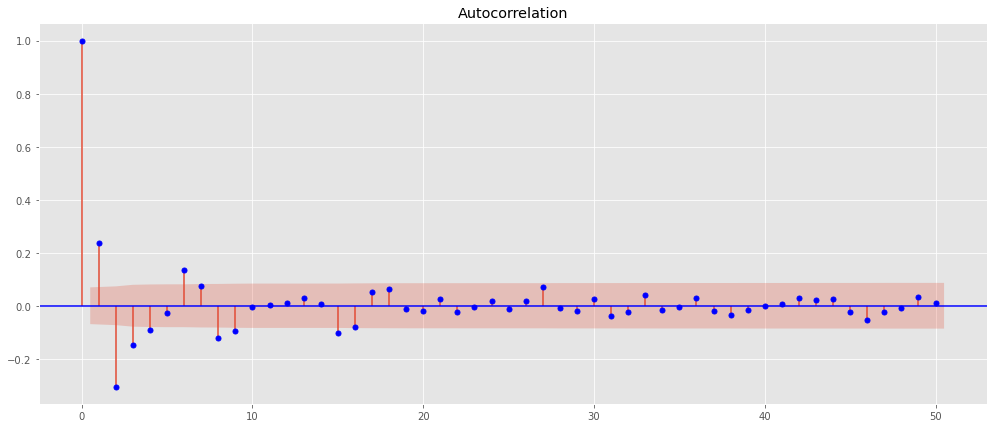

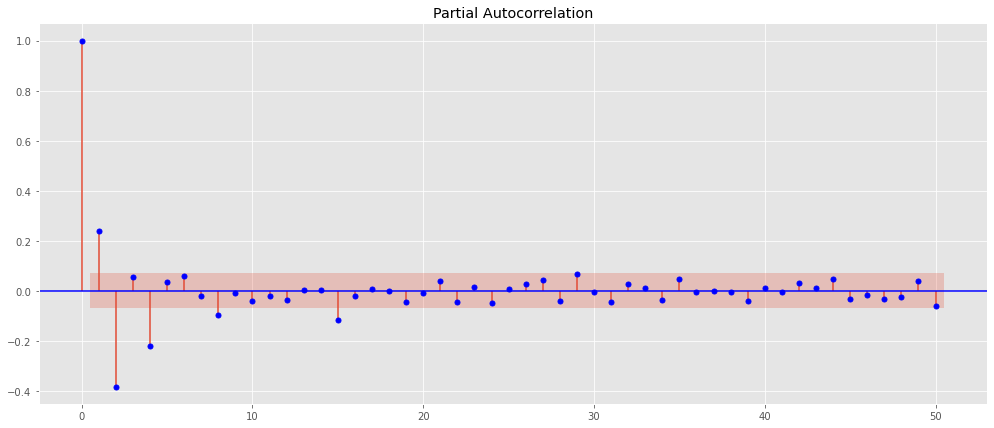

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Dt   No. Observations:                  800
Model:                     ARMA(0, 3)   Log Likelihood               -1131.834
Method:                       css-mle   S.D. of innovations              0.996
Date:                Tue, 12 Apr 2022   AIC                           2271.668
Time:                        18:35:48   BIC                           2290.407
Sample:                             0   HQIC                          2278.867
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Dt       0.3596      0.035     10.345      0.000       0.292       0.428
ma.L2.Dt      -0.3784      0.037    -10.302      0.000      -0.450      -0.306
ma.L3.Dt      -0.1774      0.036     -4.888      0.000      -0.249      -0.106
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5441           -0.0000j            1.5441           -0.0000
MA.2           -1.8383           -0.5203j            1.9105           -0.4561
MA.3           -1.8383           +0.5203j            1.9105            0.4561
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

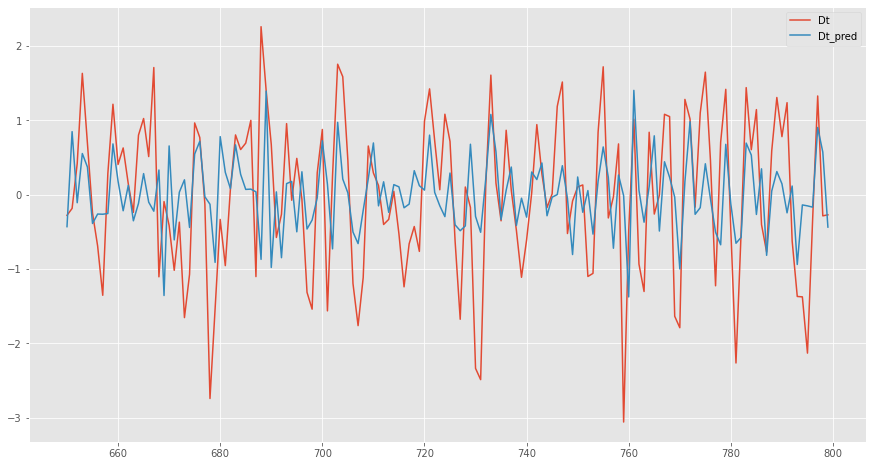

In [5]:
endog = 'Dt' # MA(3)

series_df = pd.read_csv('series.csv')

series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(0,3)).fit(trend='nc') #ajustando un MA(3)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


En este caso, también el primer correlograma nos orienta a intentar un MA(3)

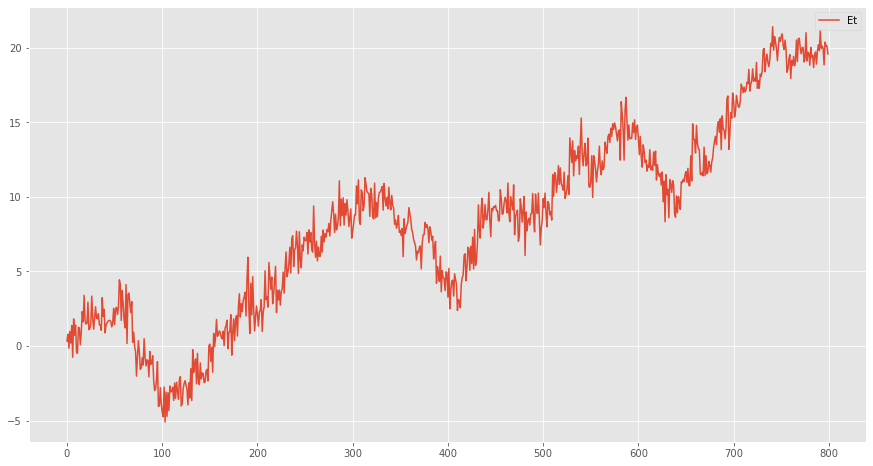

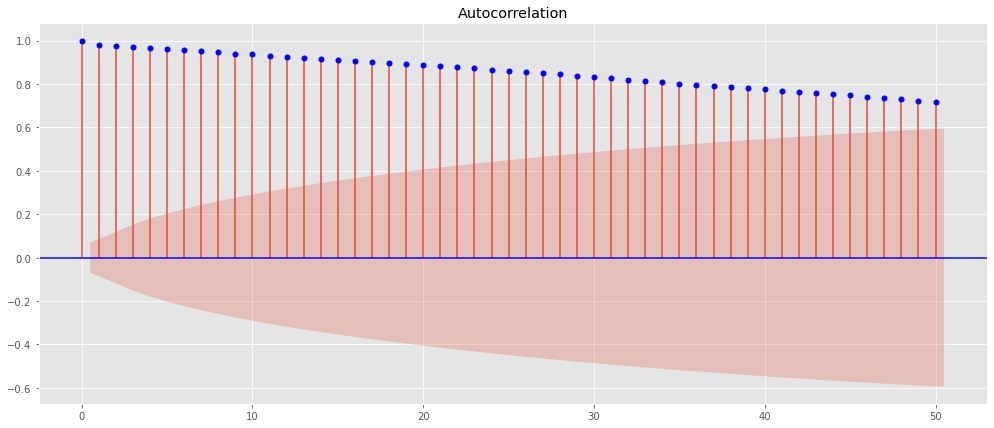

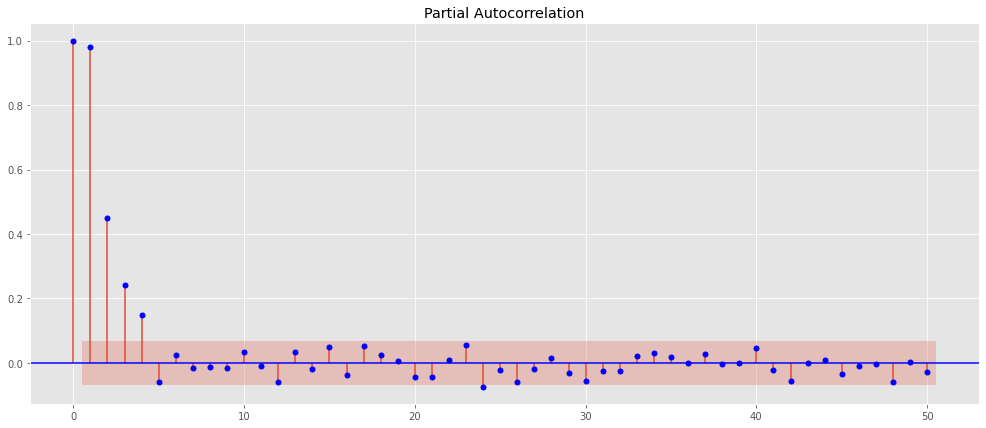

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Et   No. Observations:                  800
Model:                     ARMA(4, 0)   Log Likelihood               -1128.517
Method:                       css-mle   S.D. of innovations              0.988
Date:                Tue, 12 Apr 2022   AIC                           2267.034
Time:                        18:37:04   BIC                           2290.457
Sample:                             0   HQIC                          2276.032
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.Et       0.2635      0.034      7.666      0.000       0.196       0.331
ar.L2.Et       0.2609      0.035      7.556      0.000       0.193       0.329
ar.L3.Et       0.2402      0.035      6.952      0.000       0.173       0.308
ar.L4.Et       0.2342      0.034      6.819      0.000       0.167       0.302
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.6732           -0.0000j            1.6732           -0.5000
AR.3           -0.1765           -1.5873j            1.5971           -0.2676
AR.4           -0.1765           +1.5873j            1.5971            0.2676
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

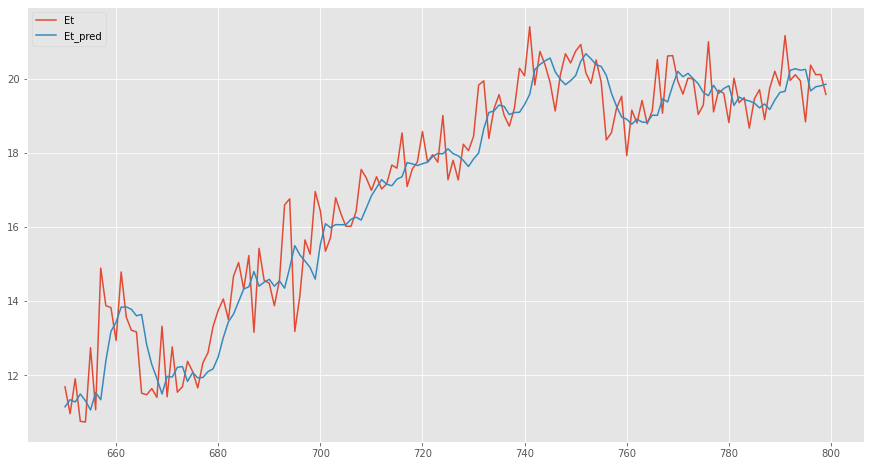

In [6]:
endog = 'Et' #AR(4)

series_df = pd.read_csv('series.csv')

series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(4,0)).fit(trend='nc') #ajustando un AR(4)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


En este caso pasa algo similar a la Serie Bt, pero por la forma del segundo correlograma es que se decide ajustar un AR(4), a pesar de tener una raiz dentro del circulo

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


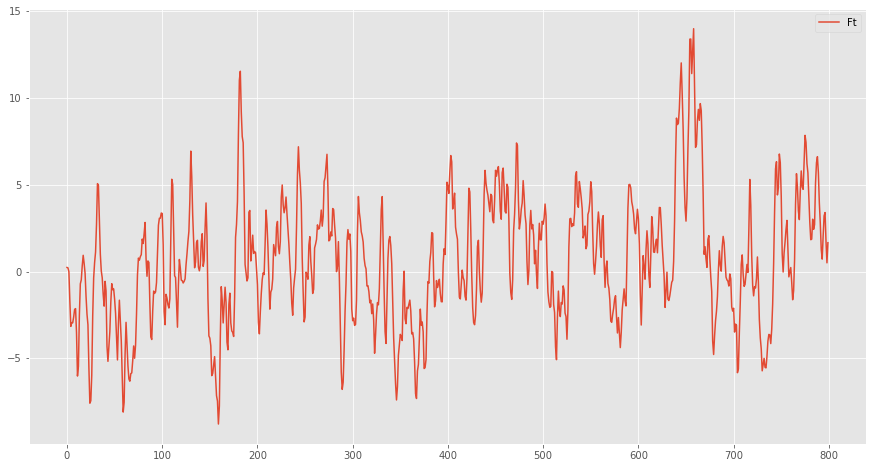

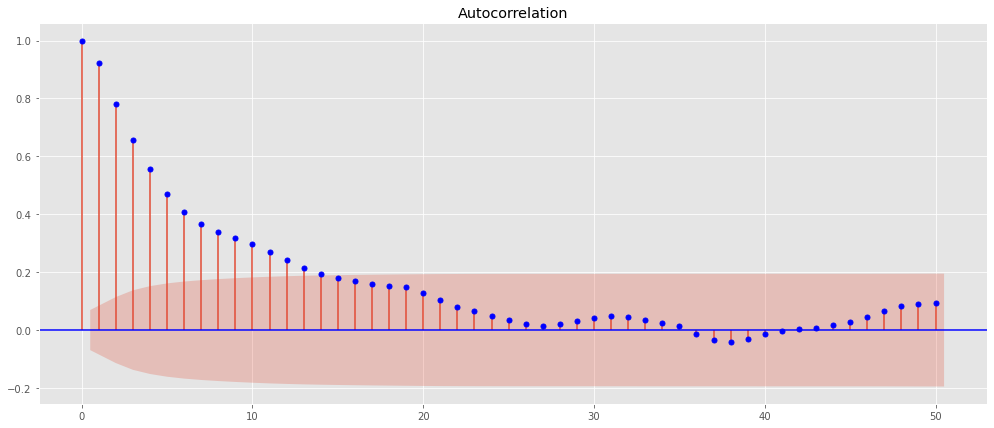

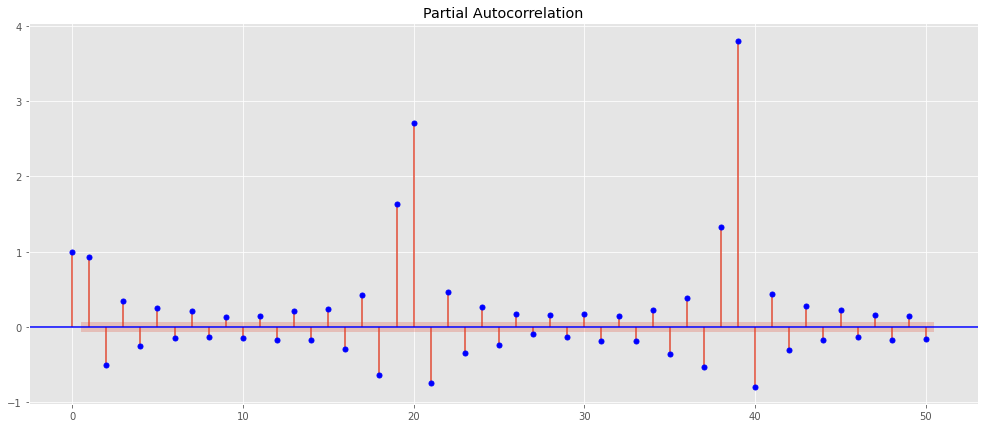

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Ft   No. Observations:                  800
Model:                     ARMA(1, 1)   Log Likelihood               -1142.767
Method:                       css-mle   S.D. of innovations              1.006
Date:                Tue, 12 Apr 2022   AIC                           2291.535
Time:                        18:39:45   BIC                           2305.588
Sample:                             0   HQIC                          2296.933
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.Ft       0.8547      0.018     46.726      0.000       0.819       0.891
ma.L1.Ft       0.9574      0.010     91.973      0.000       0.937       0.978
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1700           +0.0000j            1.1700            0.0000
MA.1           -1.0445           +0.0000j            1.0445            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

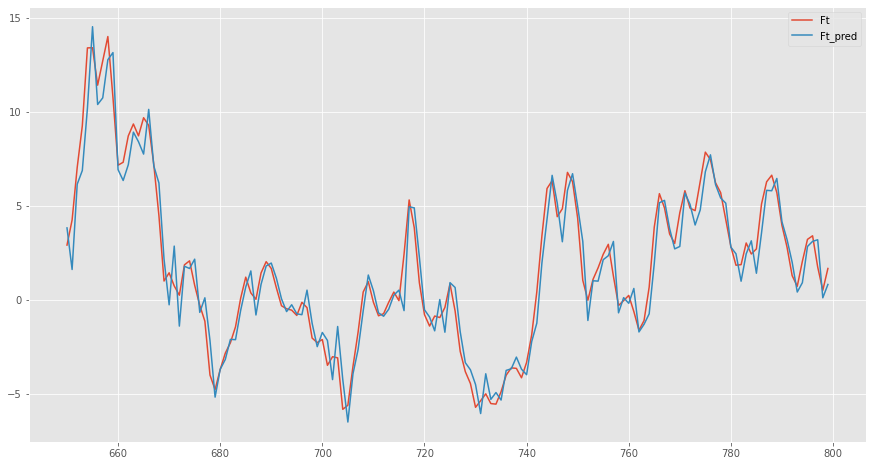

In [10]:
endog = 'Ft' # ARMA(1,1)

series_df = pd.read_csv('series.csv')

series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(1,1)).fit(trend='nc') #ajustamos un ARMA(1,1)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


al intentar primero un MA(2) la compu manda un error de que no se puede invertir segun el algoritmo utilizado, esto indica que a lo más la media movil a intentar podría ser un MA(1)

En este caso, el correlograma parcial indicaba una especie de ciclo Senoidal, en este caso se decidió ajustar un ARMA(1,1) el cual es un modelo combinado, es decir, la suma de AR(1) + MA(1), los ciclos se pueden quitar con una diferencia (dependiendo del tipo de ciclo, estocastico o determinista)

en las correlaciones cuando se ajusta un arma, podemos ver muchas correlaciones significativas

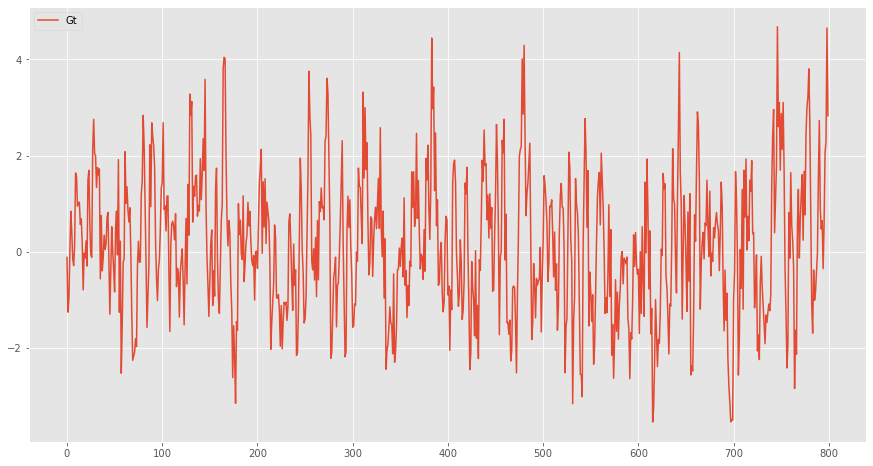

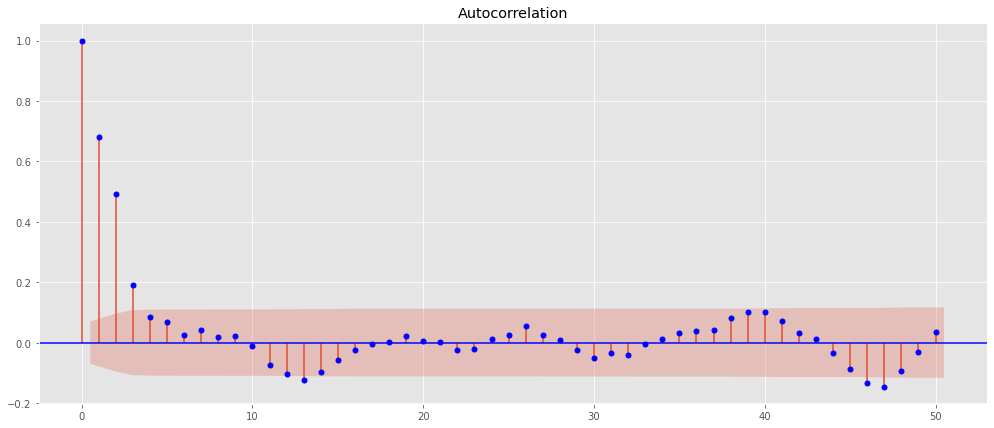

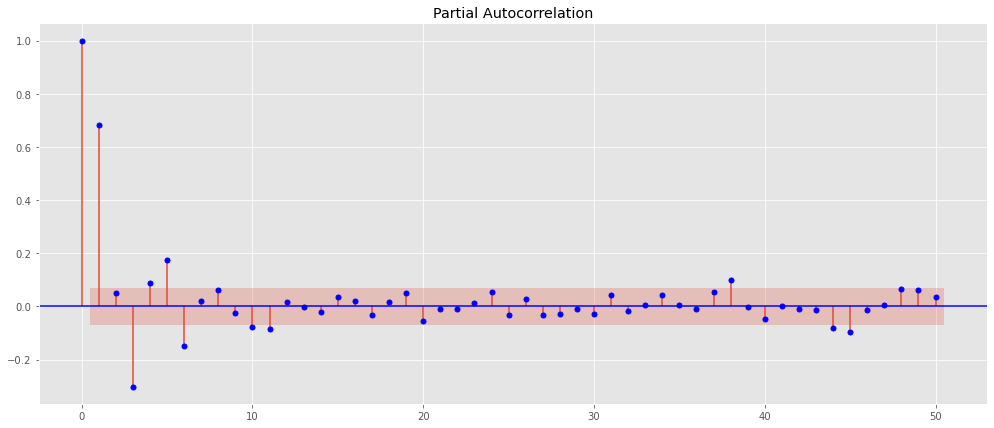

C:\Users\jonat\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Gt   No. Observations:                  800
Model:                     ARMA(0, 3)   Log Likelihood               -1115.558
Method:                       css-mle   S.D. of innovations              0.975
Date:                Tue, 12 Apr 2022   AIC                           2239.115
Time:                        18:48:56   BIC                           2257.853
Sample:                             0   HQIC                          2246.313
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Gt       0.6912      0.034     20.457      0.000       0.625       0.757
ma.L2.Gt       0.7507      0.032     23.489      0.000       0.688       0.813
ma.L3.Gt       0.2206      0.035      6.372      0.000       0.153       0.288
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.2707           -1.2292j            1.2586           -0.2845
MA.2           -0.2707           +1.2292j            1.2586            0.2845
MA.3           -2.8613           -0.0000j            2.8613           -0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

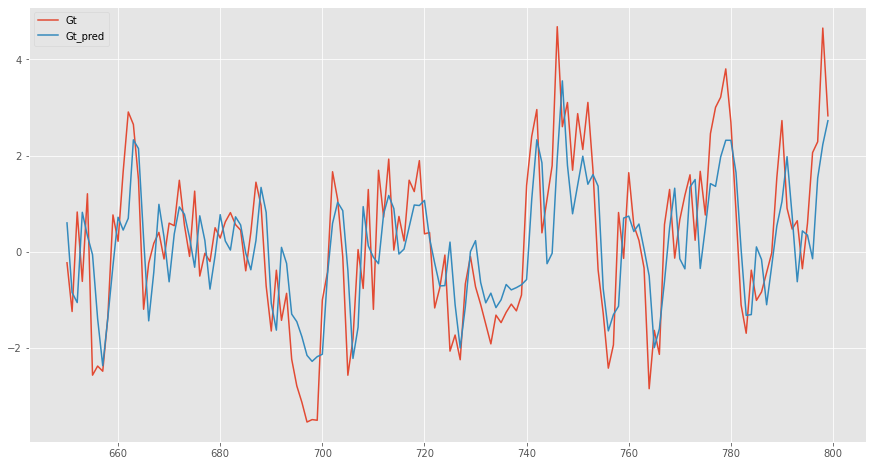

In [11]:
endog = 'Gt' #MA(3)


series_df = pd.read_csv('series.csv')

series_df[[endog]].plot(figsize=(15,8))
plt.style.use('ggplot')
plt.figsize=(15,10)
fig = plot_acf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(series_df[endog],lags=50,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

#model = ARMA(series_df[endog], order=(0,15)).fit(trend='nc')
model = ARMA(series_df[endog], order=(0,3)).fit(trend='nc') # se ajusta un MA(3)
display(model.summary())

series_df[endog+'_pred'] = model.predict(start=0,end=len(series_df))
series_df[[endog,endog+'_pred']].tail(150).plot(figsize=(15,8))


Para este caso itreamos un MA(1), MA(2) ... MA(5) salian significativos. esto podría indicar que podriamos tener un AR(p) (por el teorema de dualidad), sin embargo cuando se hizo un AR(10) no todos los coeficientes salían significativos, porqué pasa esto (no cumplirse la dualidad)?. En principio podría ser por la cantidad de datos que se tienen. Entonces por el principio de Parsimonia decidimos quedarnos con un MA(3)

pueden existir equivalencias entre ARMA = AR o ARMA = MA, dependiendo de como se factorice el ARMA